In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
# Reading the training file
IRD_MLR= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv')

In [108]:
#Importing Total number of cases from the Total cases file
Idn_cases= pd.read_csv('DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv')
Idn_cases.head(10)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [109]:
#looking mean, count, Standard deviation and other details
IRD_MLR.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [110]:
IRD_MLR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [111]:
# Importing the Total Number of cases 
IRD_MLR['Total_Cases'] = dn_cases['total_cases']
IRD_MLR.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [112]:
#dn_iq represents Iquitos
dn_iq = IRD_MLR[IRD_MLR['city']=='iq']
dn_iq.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


In [113]:
#Filling the NULL values for the city Iquitos with the mean of each column
dn_iq = dn_iq.fillna(value=dn_iq.mean())
dn_iq.head(5)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,Total_Cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


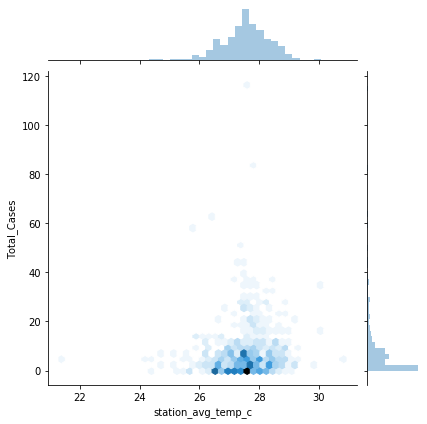

In [114]:
sns.jointplot(x = 'station_avg_temp_c', y = 'Total_Cases', data = dn_iq, kind = 'hex')

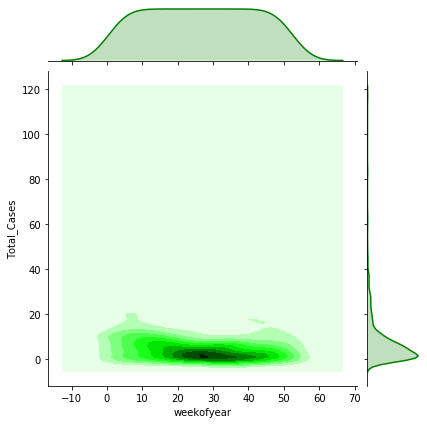

In [115]:
sns.jointplot(x = 'weekofyear', y = 'Total_Cases', data = dn_iq, color = 'green', kind = 'kde')

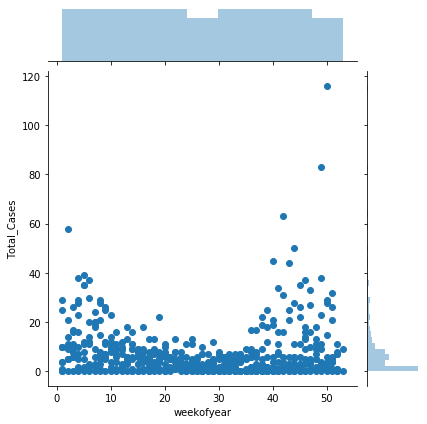

In [116]:
sns.jointplot(x = 'weekofyear', y = 'Total_Cases', data = dn_iq)

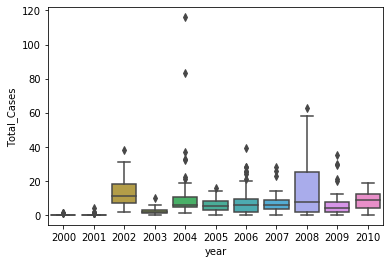

In [117]:
sns.boxplot(x='year', y = 'Total_Cases', data = dn_iq)

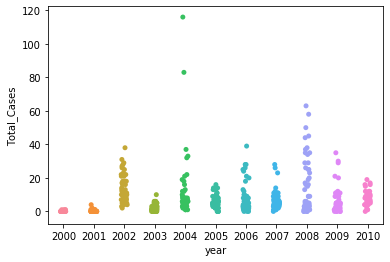

In [118]:
sns.stripplot(x='year', y = 'Total_Cases', data = dn_iq)

# 

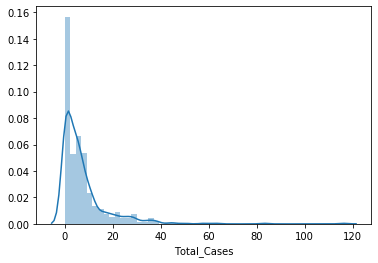

In [119]:
sns.distplot(dn_iq['Total_Cases'])

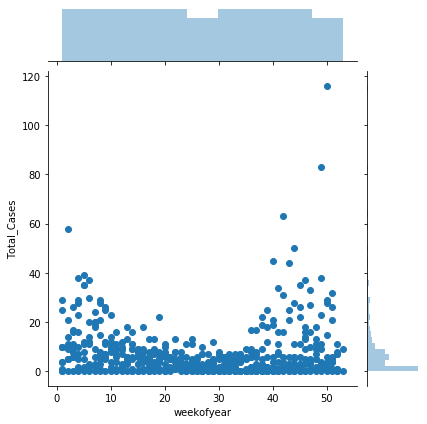

In [120]:
sns.jointplot(data = dn_iq, x = 'weekofyear', y = 'Total_Cases')

In [121]:
PP = dn_iq.drop(['city', 'year','week_start_date'], axis =1)

In [122]:
#sns.pairplot(PP, hue = 'Total_Cases')
#fig.set_size_inches(15,15)

Text(0, 0.5, 'Frequency')

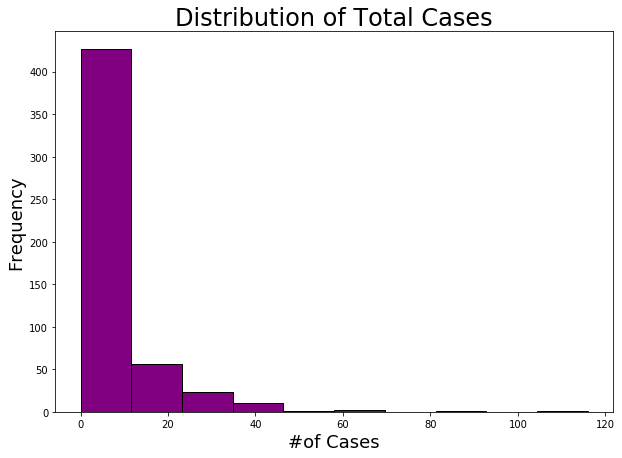

In [125]:
dn_iq.Total_Cases.plot(kind='hist', color='purple', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Total Cases', size=24)
plt.xlabel('#of Cases', size=18)
plt.ylabel('Frequency', size=18)

In [100]:
hm = dn_sj.pivot_table(index = 'weekofyear', columns = ['station_avg_temp_c','station_precip_mm'], values = 'Total_Cases')

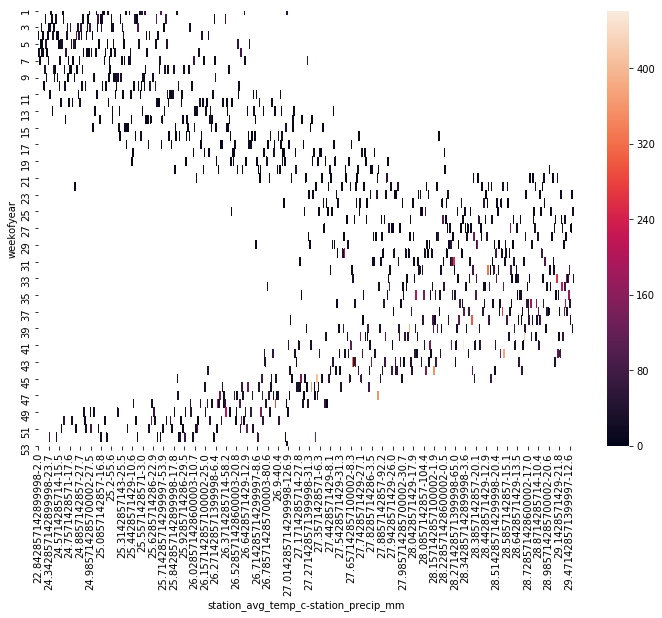

In [126]:
plt.rcParams['figure.figsize'] = (12,8)
sns.heatmap(hm)

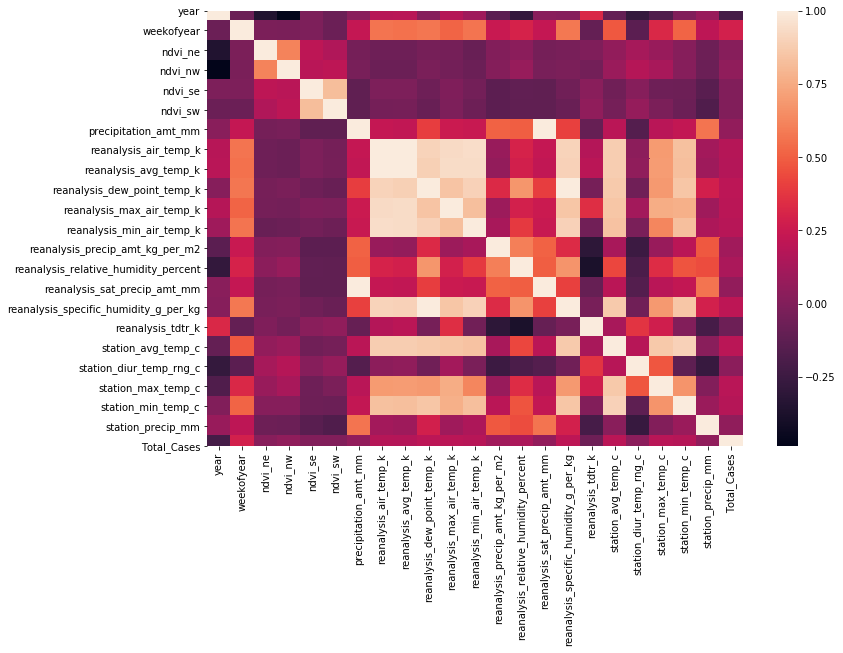

In [127]:
sns.heatmap(dn_sj.corr())

In [128]:
import statsmodels.formula.api as smf
model = smf.ols("""Total_Cases ~ ndvi_ne + ndvi_nw + ndvi_se + ndvi_sw + precipitation_amt_mm + 
reanalysis_air_temp_k + reanalysis_avg_temp_k + reanalysis_dew_point_temp_k + reanalysis_max_air_temp_k +
reanalysis_min_air_temp_k + reanalysis_precip_amt_kg_per_m2 + reanalysis_relative_humidity_percent + 
reanalysis_sat_precip_amt_mm + reanalysis_specific_humidity_g_per_kg + reanalysis_tdtr_k +
station_avg_temp_c + station_diur_temp_rng_c + station_max_temp_c + station_min_temp_c + station_precip_mm""",
                data = dn_sj).fit()

In [129]:
model.params

Intercept                                5985.636813
ndvi_ne                                    -1.781055
ndvi_nw                                    15.389848
ndvi_se                                     8.826240
ndvi_sw                                    -9.584717
precipitation_amt_mm                       -0.037868
reanalysis_air_temp_k                      81.887225
reanalysis_avg_temp_k                     -45.629828
reanalysis_dew_point_temp_k               -81.979681
reanalysis_max_air_temp_k                  16.550163
reanalysis_min_air_temp_k                   3.586864
reanalysis_precip_amt_kg_per_m2             0.055036
reanalysis_relative_humidity_percent       10.186222
reanalysis_sat_precip_amt_mm               -0.037868
reanalysis_specific_humidity_g_per_kg      34.305130
reanalysis_tdtr_k                         -17.577365
station_avg_temp_c                         -5.230944
station_diur_temp_rng_c                     3.896681
station_max_temp_c                          3.

In [130]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total_Cases   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     4.334
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           2.20e-09
Time:                        22:43:11   Log-Likelihood:                -4974.5
No. Observations:                 936   AIC:                             9989.
Df Residuals:                     916   BIC:                         1.009e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                              5985.6368   6973.012      0.858      0.391   -7699.298    1.97e+04
ndvi_ne                                  -1.7811     22.011     -0.081      0.936     -44.978      41.416
ndvi_nw                                  15.3898     24.003      0.641      0.522     -31.718      62.498
ndvi_se                                   8.8262     52.450      0.168      0.866     -94.110     111.762
ndvi_sw                                  -9.5847     53.376     -0.180      0.858    -114.338      95.169
precipitation_amt_mm                     -0.0379      0.025     -1.502      0.133      -0.087       0.012
reanalysis_air_temp_k                    81.8872     88.725      0.923      0.356     -92.240     256.015
reanalysis_avg_temp_k                   -45.6298     22.052     -2.069      0.039     -88.908      -2.351
reanalysis_dew_point_temp_k             -81.9797     82.581     -0.993      0.321    -244.049      80.089
reanalysis_max_air_temp_k                16.5502      5.317      3.113      0.002       6.115      26.985
reanalysis_min_air_temp_k                 3.5869      5.473      0.655      0.512      -7.155      14.329
reanalysis_precip_amt_kg_per_m2           0.0550      0.067      0.827      0.408      -0.076       0.186
reanalysis_relative_humidity_percent     10.1862     18.310      0.556      0.578     -25.749      46.121
reanalysis_sat_precip_amt_mm             -0.0379      0.025     -1.502      0.133      -0.087       0.012
reanalysis_specific_humidity_g_per_kg    34.3051     23.123      1.484      0.138     -11.074      79.685
reanalysis_tdtr_k                       -17.5774      5.792     -3.035      0.002     -28.945      -6.210
station_avg_temp_c                       -5.2309      5.579     -0.938      0.349     -16.180       5.718
station_diur_temp_rng_c                   3.8967      3.475      1.122      0.262      -2.922      10.716
station_max_temp_c                        3.0660      2.854      1.074      0.283      -2.535       8.667
station_min_temp_c                        1.7572      3.426      0.513      0.608      -4.967       8.481
station_precip_mm                        -0.0106      0.076     -0.140      0.889      -0.159       0.138
==============================================================================
Omnibus:                      866.510   Durbin-Watson:                   0.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26510.640
Skew:                           4.317   Prob(JB):                         0.00
Kurtosis:                      27.601   Cond. No.                     3.95e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix 

In [132]:
#Since we are predicting the Total Cases we are droping the Total_cases column as this will be "Y" value - San Juan
x1 = dn_iq.drop(['Total_Cases'], axis = 1).values
x1
dn_iq.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'Total_Cases'],
      dtype='object')

In [133]:
#WE are removing the Yean and City Column as they do mot hae any correlation with the rest of the data
#x = np.delete(x1,[0,3],1)
#x = np.delete(x,0,1)
x = dn_iq[[ 'weekofyear', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm',]]

In [134]:
# We are assigning the Y values to the Total Cases as we need to train the Data for running the model on TEST dataset
y = dn_iq['Total_Cases'].values

In [138]:
#importing the train_test_split Library from Python library to train assign test group 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)

In [139]:
#running the model on assigned Train data
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
#predictin the Y value for the test data
y_pred=ml.predict(x_test)
y_pred

array([ 3.61214718, 11.65402105,  3.22117403,  5.11721663,  6.70235664,
        9.25667419,  3.88283481,  4.1460521 , 11.98597659,  6.87860843,
        9.97128279,  8.51908147,  8.11202272,  6.49143674,  9.39886288,
        3.90383296, 10.36850271,  6.68935747, 12.33800717,  7.75909046,
        7.70196023,  3.23972735,  1.15523568,  6.25981578,  3.3541003 ,
        3.75445447,  6.32051525, 11.51075779,  7.09784519, 10.50882684,
        9.36775162,  2.41220441,  6.16472645,  6.59692827,  4.06994084,
        3.63362761,  9.76916328, 15.68694413,  8.86734709,  6.31831173,
        3.16581881,  6.17520682, 12.20667881,  7.30081489,  5.42206252,
        8.13318398,  3.76097711,  6.54266236, -2.07715598,  9.07274617,
        0.59050485,  8.97613919,  7.79946201,  6.80018233,  9.46422353,
       -0.96631168,  8.8449555 ,  8.00311455, 10.52558182,  6.69838132,
        6.73446734,  3.21407995,  3.64408088, 12.85736409,  2.65136754,
       10.92991526, 12.39664477,  7.86281663,  9.82131394,  3.26

In [141]:
(y_test)

array([  8,   7,   5,   0,   2,  10,   5,   0,  10,   1,   6,   7,   1,
         5,  35,   4,  33,   3,   1,   9,  21,   0,   0,   0,   0,   0,
         1,   3,   0,   5,  10,   3,   3,  29,  14,   0,   7,   3,   6,
        21,   5,   9,   5,  24,  29,  16,   0,   6,   0,   6,   8,  44,
         0,   9,  20,   7,   2,  21,  28,   0,  11,   0,   4,  13,   2,
        11,   0,  23,   0,   2,   0,   4,   2,   6,   2,   2,   5,   5,
         0,   7,  28,   1,  10,   9,   0,   0,   6,  11,  17,   2,  16,
         5,   4,  12,  37,   1,   6, 116,  11,  58,   2,   5,  16,   8,
         0,   1,   9,   9,   4,   1,   0,   6,   1,   6,   4,   0,   5,
         3,   4,   0,   0,  11,   3,   3,  11,   0,   6,  25,   0,   4,
         5,  34,   0,   7,   5,   5,  35,   1,  10,   0,   0,   1,   2,
         7,   5,   3,   0,   3,   6,   0,   1,   0,   0,   6,  19,   3],
      dtype=int64)

In [142]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

6.902117477911326

In [143]:
metrics.mean_squared_error(y_test, y_pred)

162.9446537082377

In [144]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

12.764977622708066

In [145]:
#round_to_tenths = [round(num, 0) for num in y_pred]
#round_to_tenths 

In [146]:
dn_sj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 25 columns):
city                                     936 non-null object
year                                     936 non-null int64
weekofyear                               936 non-null int64
week_start_date                          936 non-null object
ndvi_ne                                  936 non-null float64
ndvi_nw                                  936 non-null float64
ndvi_se                                  936 non-null float64
ndvi_sw                                  936 non-null float64
precipitation_amt_mm                     936 non-null float64
reanalysis_air_temp_k                    936 non-null float64
reanalysis_avg_temp_k                    936 non-null float64
reanalysis_dew_point_temp_k              936 non-null float64
reanalysis_max_air_temp_k                936 non-null float64
reanalysis_min_air_temp_k                936 non-null float64
reanalysis_precip_amt_kg_per_m2  

In [74]:
from statsmodels.stats.anova import anova_lm

In [75]:
#Since we are predicting the Total Cases we are droping the Total_cases column as this will be "Y" value - Iquitos
x1 = dn_iq.drop(['Total_Cases'], axis = 1).values
x1
dn_iq.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'Total_Cases'],
      dtype='object')

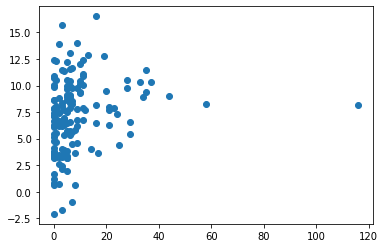

In [76]:
plt.scatter(y_test,y_pred)

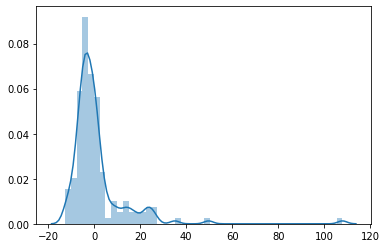

In [77]:
sns.distplot(y_test-y_pred)